In [1]:
#Numpy - for scientific computing
import numpy as np
rng = np.random.default_rng()

import scipy
from scipy import optimize
from scipy.optimize import curve_fit 

#For image reading and analysis
import glob
import skimage.io
import skimage.filters as sf
from skimage import io, measure, filters, transform, morphology

#Matplotlib plotting packages
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns
#sns.set()

import lmfit

# For loading bars
from tqdm.notebook import tqdm as tqdm

# For creating DataFrames
import pandas as pd

In [2]:
#Import files and add the names as strings to an array
file_path = '../../analyzed_data/gliding/'
# ff1 = '2023-07-10_Gliding/'
# ff2 = '2023-07-11_Gliding/'
# ff3 = '2023-07-12_Gliding/'
# ff4 = '2023-08-11_Gliding/'
# ff5 = '2023-08-15_Gliding/'
# ff6 = '2023-08-16_Gliding/'
# ff7 = '2023-08-17_Gliding/'
# ff8 = '2023-08-18_Gliding/'
# ff9 = '2023-09-07_Gliding/'
#ff10 = '2023-10-18_Gliding/'
ff11 = '2023-10-19_Gliding/'
ff12 = '2023-10-20_Gliding/'
ff13 = '2023-10-21_Gliding/'
ff14 = '2023-10-23_Gliding/'
ff15 = '2023-10-24_Gliding/'
ff16 = '2023-10-26_Gliding/'
ff17 = '2023-10-30_Gliding/'
ff18 = '2023-10-31_Gliding/'
ff19 = '2023-11-01_Gliding/'
ff = [ff11, ff12, ff13, ff14, ff15, ff16, ff17, ff18, ff19]
included_files = '*.csv'

data_csv = []
for file_folder in ff:
    path = file_path+file_folder+included_files
    files = np.sort(glob.glob(path))
    data_csv.append(files)
data_csv = np.concatenate(data_csv)

#Convert file names to a dataframe
dfs = []
for file in data_csv:
    temp_df=pd.read_csv(file)
    #add a column of file names
    temp_df['date']=file.split('/')[-2].split('_')[0]
    temp_df['file_name']=file.split('/')[-1]
    dfs.append(temp_df)
df=pd.concat(dfs)

#reset the index and drop any extraneous columns
df=df.reset_index()
df=df.drop(columns=['Unnamed: 0', 'level_0'])

In [3]:
#check columns
#list(df.columns.values)
#desired column order
col_order = ['speed (nm/s)',
            'ATP_Conc_uM',
            'ADP_Conc_uM',
            'P_Conc_uM',
            'Motor_Conc_uM',
            'MT_Conc_uM',
            'Motor Type',
            'Flag_Conc_mg-ml',
            'BSA_Caesin_Both',
            'Acq_Time_s',
            'Time_Interval_s',
            'Cy5_exptime_ms',
            'Cy5_gain',
            'YFP_exptime_ms',
            'YFP_gain',
            'Temperature',
            'date',
            'file_name',
            'index',
            'area',
            'major_axis_length',
            'minor_axis_length',
            'centroid-0',
            'centroid-1',
            'orientation',
            'label',
            'MT len (um)',
            'r^2',
            'skele r^2']

In [4]:
df[col_order].to_csv(file_path + "20231117_aggregateGliding")

In [5]:
pd.read_csv(file_path+"20231117_aggregateGliding")

,Unnamed: 0,speed (nm/s),ATP_Conc_uM,ADP_Conc_uM,P_Conc_uM,Motor_Conc_uM,MT_Conc_uM,Motor Type,Flag_Conc_mg-ml,BSA_Caesin_Both,...,area,major_axis_length,minor_axis_length,centroid-0,centroid-1,orientation,label,MT len (um),r^2,skele r^2
0,0,120.185088,1420.0,0.0,0.0,0.010,0.04,NCD_YFP_ilid,0.02,Both,...,13,18.647381,0.931076,45.461538,331.000000,-0.930734,2,2.541287,0.984177,0.969235
1,1,222.263636,1420.0,0.0,0.0,0.010,0.04,NCD_YFP_ilid,0.02,Both,...,31,36.107213,2.266950,161.000000,41.258065,0.135598,7,3.104649,0.993554,0.980907
2,2,154.079825,1420.0,0.0,0.0,0.010,0.04,NCD_YFP_ilid,0.02,Both,...,19,24.868389,1.865512,240.157895,45.000000,1.076441,11,2.785722,0.980140,0.950115
3,3,107.800117,1420.0,0.0,0.0,0.010,0.04,NCD_YFP_ilid,0.02,Both,...,30,42.043591,3.641550,243.066667,267.433333,0.947438,12,1.583909,0.835858,0.691244
4,4,120.750000,1420.0,0.0,0.0,0.010,0.04,NCD_YFP_ilid,0.02,Both,...,16,19.896356,1.253996,302.500000,263.312500,-0.385918,13,2.766593,0.929705,0.672593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24027,24027,136.850000,70.0,0.0,0.0,0.001,0.04,NCD_YFP_ilid,0.02,Both,...,34,39.596245,1.121827,475.500000,317.058824,-0.133760,131,5.476757,0.992420,0.893687
24028,24028,66.700000,70.0,0.0,0.0,0.001,0.04,NCD_YFP_ilid,0.02,Both,...,19,22.359548,1.295923,486.000000,229.263158,0.201453,138,2.913596,0.980380,0.990326
24029,24029,54.912500,70.0,0.0,0.0,0.001,0.04,NCD_YFP_ilid,0.02,Both,...,19,26.466711,1.536511,489.263158,67.947368,0.768063,141,3.639589,0.983800,0.985300
24030,24030,82.800000,70.0,0.0,0.0,0.001,0.04,NCD_YFP_ilid,0.02,Both,...,12,19.167707,0.698507,488.583333,496.500000,-0.803723,142,1.843783,0.968364,0.972005


In [7]:
np.unique(df["ATP_Conc_uM"])

array([2.00e+00, 5.00e+00, 1.00e+01, 2.00e+01, 3.00e+01, 4.00e+01,
       5.00e+01, 7.00e+01, 1.00e+02, 3.00e+02, 5.00e+02, 1.42e+03,
       5.00e+03, 1.00e+04,      nan])

# Motor Concentrations

Text(0, 0.5, 'Speed (nm/s)')

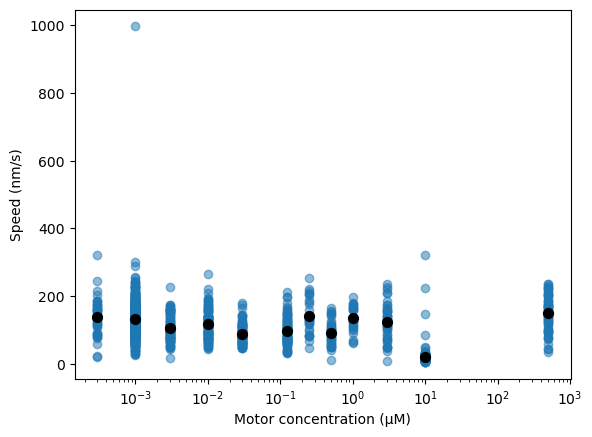

In [9]:
df_temp=df.loc[(df["ATP_Conc_uM"] == 1420)].loc[(df["ADP_Conc_uM"] == 0)].loc[(df["P_Conc_uM"] == 0)]
plt.scatter(df_temp['Motor_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.5)

df_temp_mean = df_temp.groupby('Motor_Conc_uM', as_index=False).mean()
plt.scatter( df_temp_mean['Motor_Conc_uM'], df_temp_mean['speed (nm/s)'], c='k', s=50) 

plt.xscale('log')
plt.xlabel('Motor concentration (µM)')
plt.ylabel('Speed (nm/s)')

# ATP

In [10]:
#Speed ATP fit
def kcatKm_eqn(conc, kcat, Km):
    """
    Given a concentration value in uM, this function returns motor speeds in nm/s
    
    Parameters:
    conc = 1D array of ATP concentrations in uM units
    kcat = maximum hydrolysis rate at saturating ATP units 1/s
    Km = concnetration at which motors walk at half max speed in units uM
    
    Returns:
    A 1D array of motor speeds corresponding to the given concentrations
    """
    
    return (kcat*conc)/(Km +conc)



#Curve-fit to the Langmuir curve
def kcatKm_curve_fit(conc, speeds, maxconc, d, p0):
    """
    Performs a curve fitting using scipy.optimize.curve_fit to fit data
    
    Parameters
    conc = 1D array of ATP concentrations in uM units
    speeds = 1D array of measured motor speeds in 1/s units
    maxconc = maximum concentration of data taken in uM units
    p0 = 1D list with 2 entries of parameter guesses for kcat and Km
    
    Returns
    param = 1D list with fit values of each parameter (kcat and Km)
    curve = 1D array of motor speeds for every concentration value in xvals
    xvals = 1D array from 0 to maxconc with step size 1
    """
    
    
    #Curve fits and returns parameter values as well as the covarience
    param, param_cov = curve_fit(kcatKm_eqn, 
                                 conc, 
                                 speeds/d,
                                 p0, 
                                 bounds = (np.zeros(2), np.ones([2])*np.inf))

    #stores the new function information according to the coefficients given by curve-fit() function 
    xvals=np.linspace(0, int(maxconc+1), int(maxconc+1))
    curve = d*kcatKm_eqn(xvals, param[0], param[1])
    
    return param, curve, xvals

[17.76249936 51.83089124]


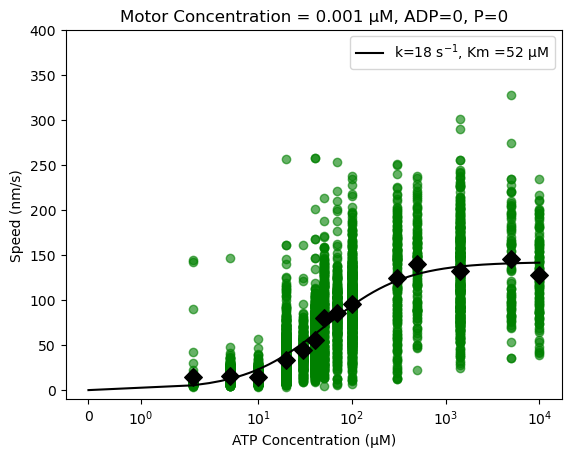

In [11]:
df_temp=df.loc[(df["Motor_Conc_uM"] == 0.001)].loc[(df["ADP_Conc_uM"]==0)].loc[(df["P_Conc_uM"] == 0)]
plt.scatter(df_temp['ATP_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.6, c='g')

ATP_mean = df_temp.groupby('ATP_Conc_uM', as_index=False).mean()['ATP_Conc_uM']
ATP_mean_speed = df_temp.groupby('ATP_Conc_uM', as_index=False).mean()['speed (nm/s)']
plt.scatter( df_temp.groupby('ATP_Conc_uM').mean().reset_index()['ATP_Conc_uM'], df_temp.groupby('ATP_Conc_uM').mean().reset_index()['speed (nm/s)'], c='k', s=80, marker='D') 

param, curve, xval = kcatKm_curve_fit(ATP_mean, ATP_mean_speed, np.max(ATP_mean), 8, [100, 100])
plt.plot(xval, curve, c='k', label ='k=' + str(round(param[0])) + ' s$^{-1}$, Km =' + str(round(param[1])) +' µM')

plt.legend()
plt.xscale('symlog')
plt.xlabel('ATP Concentration (µM)')
plt.ylabel('Speed (nm/s)')
plt.title('Motor Concentration = 0.001 µM, ADP=0, P=0')
plt.ylim(-10,400)
print(param)

In [12]:
def ecdf(array):
    arsort = np.sort(array)
    perc = np.arange(len(array))/len(array)
    return perc

(0.0, 300.0)

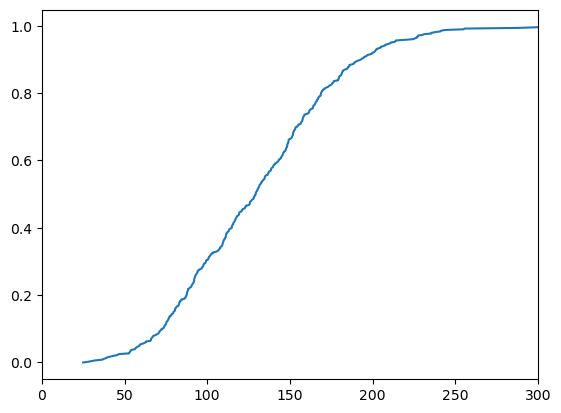

In [13]:
df_temp=df.loc[(df["Motor_Conc_uM"] == 0.001)].loc[(df["ADP_Conc_uM"]==0)].loc[(df["P_Conc_uM"] == 0)].loc[(df['ATP_Conc_uM']==1420)]

plt.plot(np.sort(df_temp['speed (nm/s)']), ecdf(df_temp['speed (nm/s)']))
plt.xlim(0,300)




## Compute confidence intervals

I will bootstrap and compute a mean and then compute confidence intervals.

Define a function to find the confidence interal

In [14]:
def conf_int(data, num_reps):
    boot_data = rng.choice(data, size=(len(data), num_reps))
    boot_mean = np.average(boot_data, axis=0)
    conf = np.percentile(boot_mean, [2.5, 97.5])
    return conf

                       0           1           2            3           4   \
ATP_Conc_uM      2.000000    5.000000   10.000000    20.000000   30.000000   
speed (nm/s)    14.018494   15.568493   14.686828    33.773560   44.539934   
Conf int 2.5%    9.752770   14.741380   14.159188    32.970043   41.933579   
Conf int 97.5%  19.091949   16.503396   15.198781    34.631566   47.230329   
num points      85.000000  456.000000  595.000000  1803.000000  248.000000   

                         5           6           7           8           9   \
ATP_Conc_uM       40.000000   50.000000   70.000000  100.000000  300.000000   
speed (nm/s)      55.212049   79.632195   85.834338   95.784180  124.023813   
Conf int 2.5%     54.237783   74.797292   82.158651   93.180076  115.851895   
Conf int 97.5%    56.178215   84.354188   89.536325   98.416377  132.131867   
num points      1730.000000  265.000000  327.000000  675.000000  178.000000   

                        10           11           12    

Text(0.5, 1.0, 'Motor Concentration = 0.001 µM, ADP=0, P=0')

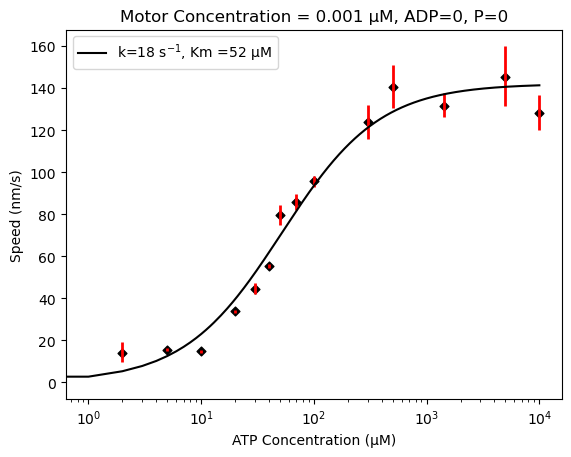

In [15]:
df_temp=df.loc[(df["Motor_Conc_uM"] == 0.001)].loc[(df["ADP_Conc_uM"]==0)].loc[(df["P_Conc_uM"] == 0)]
erb = np.zeros((len(np.unique(df_temp['ATP_Conc_uM'])), 2))
numpt = np.zeros(len(np.unique(df_temp['ATP_Conc_uM'])))
for i, atp in enumerate(np.unique(df_temp['ATP_Conc_uM'])):
    temp_data = np.sort(df_temp.loc[(df_temp['ATP_Conc_uM'] == atp)]['speed (nm/s)'])
    confint = conf_int(temp_data, 1000)
    erb[i] = confint
    numpt[i] = len(temp_data)
    plt.vlines(atp, confint[0], confint[1], color='r', lw=2)

ATP_mean = df_temp.groupby('ATP_Conc_uM', as_index=False).mean()['ATP_Conc_uM']
ATP_mean_speed = df_temp.groupby('ATP_Conc_uM', as_index=False).mean()['speed (nm/s)']
plt.scatter( df_temp.groupby('ATP_Conc_uM').mean().reset_index()['ATP_Conc_uM'], df_temp.groupby('ATP_Conc_uM').mean().reset_index()['speed (nm/s)'], c='k', s=20, marker='D') 

print(pd.DataFrame([ATP_mean, ATP_mean_speed, erb[:,0], erb[:,1], numpt], index=['ATP_Conc_uM', 'speed (nm/s)', 'Conf int 2.5%', 'Conf int 97.5%', 'num points']))

param, curve, xval = kcatKm_curve_fit(ATP_mean, ATP_mean_speed, np.max(ATP_mean), 8, [100, 100])
plt.plot(xval, curve, c='k', label ='k=' + str(round(param[0])) + ' s$^{-1}$, Km =' + str(round(param[1])) +' µM')

plt.legend(loc='upper left')
plt.xscale('log')
plt.xlabel('ATP Concentration (µM)')
plt.ylabel('Speed (nm/s)')
plt.title('Motor Concentration = 0.001 µM, ADP=0, P=0')


## Vilfan Model

In [16]:
#Speed ATP fit
def kcatKm_eqnVil(conc, kcat, Km):
    """
    Given a concentration value in uM, this function returns motor speeds in nm/s
    
    Parameters:
    conc = 1D array of ATP concentrations in uM units
    kcat = maximum hydrolysis rate at saturating ATP units 1/s
    Km = concnetration at which motors walk at half max speed in units uM
    
    Returns:
    A 1D array of motor speeds corresponding to the given concentrations
    """
    
    return (kcat*(conc/Km)**2)/(1 +(conc/Km)+(conc/Km)**2)



#Curve-fit to the Langmuir curve
def kcatKm_curve_fitVil(conc, speeds, maxconc, d, p0):
    """
    Performs a curve fitting using scipy.optimize.curve_fit to fit data
    
    Parameters
    conc = 1D array of ATP concentrations in uM units
    speeds = 1D array of measured motor speeds in 1/s units
    maxconc = maximum concentration of data taken in uM units
    p0 = 1D list with 2 entries of parameter guesses for kcat and Km
    
    Returns
    param = 1D list with fit values of each parameter (kcat and Km)
    curve = 1D array of motor speeds for every concentration value in xvals
    xvals = 1D array from 0 to maxconc with step size 1
    """
    
    
    #Curve fits and returns parameter values as well as the covarience
    param, param_cov = curve_fit(kcatKm_eqnVil, 
                                 conc, 
                                 speeds/d,
                                 p0, 
                                 bounds = (np.zeros(2), np.ones([2])*np.inf))

    #stores the new function information according to the coefficients given by curve-fit() function 
    xvals=np.linspace(0, int(maxconc+1), int(maxconc+1))
    curve = d*kcatKm_eqnVil(xvals, param[0], param[1])
    
    return param, curve, xvals

[17.28055576 28.91999863]


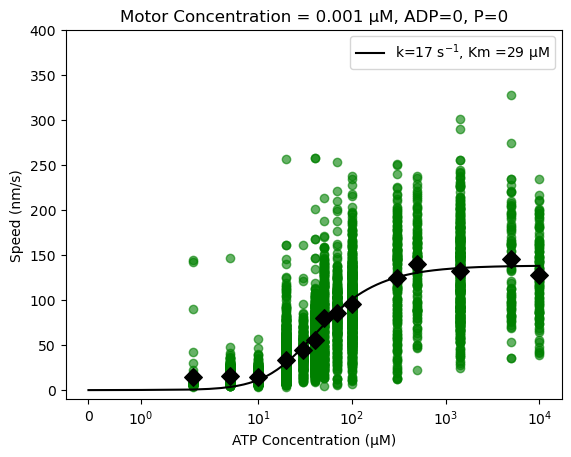

In [17]:
df_temp=df.loc[(df["Motor_Conc_uM"] == 0.001)].loc[(df["ADP_Conc_uM"]==0)].loc[(df["P_Conc_uM"] == 0)]
plt.scatter(df_temp['ATP_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.6, c='g')

ATP_mean = df_temp.groupby('ATP_Conc_uM', as_index=False).mean()['ATP_Conc_uM']
ATP_mean_speed = df_temp.groupby('ATP_Conc_uM', as_index=False).mean()['speed (nm/s)']
plt.scatter( df_temp.groupby('ATP_Conc_uM').mean().reset_index()['ATP_Conc_uM'], df_temp.groupby('ATP_Conc_uM').mean().reset_index()['speed (nm/s)'], c='k', s=80, marker='D') 

param, curve, xval = kcatKm_curve_fitVil(ATP_mean, ATP_mean_speed, np.max(ATP_mean), 8, [100, 100])
plt.plot(xval, curve, c='k', label ='k=' + str(round(param[0])) + ' s$^{-1}$, Km =' + str(round(param[1])) +' µM')

plt.legend()
plt.xscale('symlog')
plt.xlabel('ATP Concentration (µM)')
plt.ylabel('Speed (nm/s)')
plt.title('Motor Concentration = 0.001 µM, ADP=0, P=0')
plt.ylim(-10,400)
print(param)

                       0           1           2            3           4   \
ATP_Conc_uM      2.000000    5.000000   10.000000    20.000000   30.000000   
speed (nm/s)    14.018494   15.568493   14.686828    33.773560   44.539934   
Conf int 2.5%    9.803945   14.783875   14.180061    32.927611   42.029439   
Conf int 97.5%  19.968076   16.548804   15.189542    34.619491   46.998066   
num points      85.000000  456.000000  595.000000  1803.000000  248.000000   

                         5           6           7           8           9   \
ATP_Conc_uM       40.000000   50.000000   70.000000  100.000000  300.000000   
speed (nm/s)      55.212049   79.632195   85.834338   95.784180  124.023813   
Conf int 2.5%     54.283368   75.024963   82.003819   93.113509  116.047052   
Conf int 97.5%    56.262162   84.398307   89.638029   98.666798  131.625182   
num points      1730.000000  265.000000  327.000000  675.000000  178.000000   

                        10           11           12    

Text(0.5, 1.0, 'Motor Concentration = 0.001 µM, ADP=0, P=0')

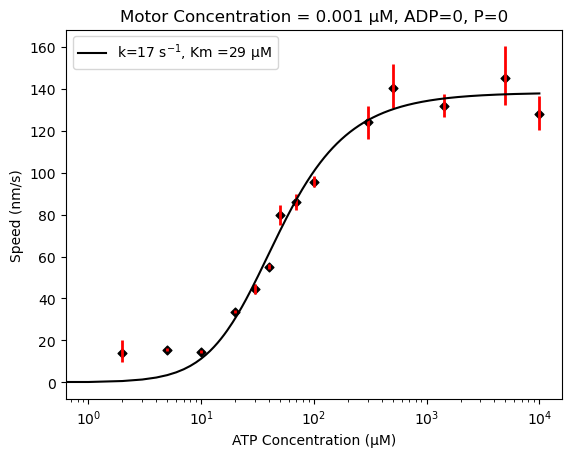

In [18]:
df_temp=df.loc[(df["Motor_Conc_uM"] == 0.001)].loc[(df["ADP_Conc_uM"]==0)].loc[(df["P_Conc_uM"] == 0)]
erb = np.zeros((len(np.unique(df_temp['ATP_Conc_uM'])), 2))
numpt = np.zeros(len(np.unique(df_temp['ATP_Conc_uM'])))
for i, atp in enumerate(np.unique(df_temp['ATP_Conc_uM'])):
    temp_data = np.sort(df_temp.loc[(df_temp['ATP_Conc_uM'] == atp)]['speed (nm/s)'])
    confint = conf_int(temp_data, 1000)
    erb[i] = confint
    numpt[i] = len(temp_data)
    plt.vlines(atp, confint[0], confint[1], color='r', lw=2)

ATP_mean = df_temp.groupby('ATP_Conc_uM', as_index=False).mean()['ATP_Conc_uM']
ATP_mean_speed = df_temp.groupby('ATP_Conc_uM', as_index=False).mean()['speed (nm/s)']
plt.scatter( df_temp.groupby('ATP_Conc_uM').mean().reset_index()['ATP_Conc_uM'], df_temp.groupby('ATP_Conc_uM').mean().reset_index()['speed (nm/s)'], c='k', s=20, marker='D') 

print(pd.DataFrame([ATP_mean, ATP_mean_speed, erb[:,0], erb[:,1], numpt], index=['ATP_Conc_uM', 'speed (nm/s)', 'Conf int 2.5%', 'Conf int 97.5%', 'num points']))

param, curve, xval = kcatKm_curve_fitVil(ATP_mean, ATP_mean_speed, np.max(ATP_mean), 8, [100, 100])
plt.plot(xval, curve, c='k', label ='k=' + str(round(param[0])) + ' s$^{-1}$, Km =' + str(round(param[1])) +' µM')

plt.legend(loc='upper left')
plt.xscale('log')
plt.xlabel('ATP Concentration (µM)')
plt.ylabel('Speed (nm/s)')
plt.title('Motor Concentration = 0.001 µM, ADP=0, P=0')

# ADP

In [19]:
#Curve-fit to the Langmuir curve
def Kprod_curve_fit(prodconc, speeds, ATPconc, kcat, Kt, maxconc, d, p0):
    """
    Performs a curve fitting using scipy.optimize.curve_fit to fit data
    
    Parameters
    conc = 1D array of ATP concentrations in uM units
    speeds = 1D array of measured motor speeds in 1/s units
    maxconc = maximum concentration of data taken in uM units
    p0 = 1D list with 2 entries of parameter guesses for kcat and Km
    
    Returns
    param = 1D list with fit values of each parameter (kcat and Km)
    curve = 1D array of motor speeds for every concentration value in xvals
    xvals = 1D array from 0 to maxconc with step size 1
    """
    
    def Kprod_eqn(prodconc, Kprod, ATPconc=ATPconc, Kt=Kt):
        """
        Given a concentration value in uM, this function returns motor speeds in nm/s

        Parameters:
        conc = 1D array of ATP concentrations in uM units
        kcat = maximum hydrolysis rate at saturating ATP units 1/s
        Km = concnetration at which motors walk at half max speed in units uM

        Returns:
        A 1D array of motor speeds corresponding to the given concentrations
        """
        return (ATPconc)/(Kt*(1 + prodconc/Kprod) + ATPconc)

    #Curve fits and returns parameter values as well as the covarience
    param, param_cov = curve_fit(Kprod_eqn, 
                                 prodconc,
                                 speeds/(d*kcat),
                                 p0, 
                                 bounds = (np.zeros(1), np.ones([1])*np.inf))

    #stores the new function information according to the coefficients given by curve-fit() function 
    xvals=np.linspace(0, int(maxconc+1), int(maxconc+1))
    curve = d*kcat*Kprod_eqn(xvals, param[0])
    
    return param, curve, xvals

In [20]:
#Curve-fit to the Langmuir curve
def Kprod_glob_curve_fit(prodconc, speeds, ATPconc, maxconc, d, p0):
    """
    Performs a curve fitting using scipy.optimize.curve_fit to fit data
    
    Parameters
    conc = 1D array of ATP concentrations in uM units
    speeds = 1D array of measured motor speeds in 1/s units
    maxconc = maximum concentration of data taken in uM units
    p0 = 1D list with 2 entries of parameter guesses for kcat and Km
    
    Returns
    param = 1D list with fit values of each parameter (kcat and Km)
    curve = 1D array of motor speeds for every concentration value in xvals
    xvals = 1D array from 0 to maxconc with step size 1
    """
    
    def Kprod_glob_eqn(prodconc, kcat, Kt, Kprod, ATPconc=ATPconc):
        """
        Given a concentration value in uM, this function returns motor speeds in nm/s

        Parameters:
        conc = 1D array of ATP concentrations in uM units
        kcat = maximum hydrolysis rate at saturating ATP units 1/s
        Km = concnetration at which motors walk at half max speed in units uM

        Returns:
        A 1D array of motor speeds corresponding to the given concentrations
        """
        return (kcat*ATPconc)/(Kt*(1 + prodconc/Kprod) + ATPconc)

    #Curve fits and returns parameter values as well as the covarience
    param, param_cov = curve_fit(Kprod_glob_eqn, 
                                 prodconc,
                                 speeds/d,
                                 p0, 
                                 bounds = (np.zeros(3), np.ones([3])*np.inf))

    #stores the new function information according to the coefficients given by curve-fit() function 
    xvals=np.linspace(0, int(maxconc+1), int(maxconc+1))
    curve = d*Kprod_glob_eqn(xvals, param[0], param[1], param[2])
    
    return param, curve, xvals

In [21]:
df.groupby(['ATP_Conc_uM', 'P_Conc_uM', 'ADP_Conc_uM'], as_index=False).mean().head(20)

,ATP_Conc_uM,P_Conc_uM,ADP_Conc_uM,major_axis_length,minor_axis_length,centroid-0,centroid-1,orientation,speed (nm/s),r^2,...,Motor_Conc_uM,MT_Conc_uM,Flag_Conc_mg-ml,Acq_Time_s,Time_Interval_s,Cy5_exptime_ms,Cy5_gain,YFP_exptime_ms,YFP_gain,Temperature
0,2.0,0.0,0.0,18.501697,1.344079,259.539939,258.543869,-0.144917,14.018494,0.878228,...,0.001,0.04,0.02,100.0,1.0,60.0,300.0,100.0,4.0,27.186047
1,5.0,0.0,0.0,23.224265,1.414174,257.513893,259.808904,0.072711,15.568493,0.915190,...,0.001,0.04,0.02,100.0,1.0,60.0,300.0,100.0,4.0,27.193939
2,10.0,0.0,0.0,22.847417,1.377993,257.814760,248.660552,0.072989,14.686828,0.918590,...,0.001,0.04,0.02,100.0,1.0,60.0,300.0,100.0,4.0,27.166923
3,20.0,0.0,0.0,29.113015,1.822138,247.211331,254.740048,-0.038670,33.773560,0.948056,...,0.001,0.04,0.02,100.0,1.0,60.0,300.0,100.0,4.0,27.156701
4,20.0,0.0,100.0,39.711538,2.708933,235.475820,259.122968,0.017289,65.602139,0.954083,...,0.001,0.04,0.02,100.0,1.0,60.0,300.0,100.0,4.0,NaN
5,20.0,0.0,300.0,42.161271,2.645741,267.460701,265.309051,-0.009897,70.116823,0.946685,...,0.001,0.04,0.02,100.0,1.0,60.0,300.0,100.0,4.0,NaN
6,20.0,0.0,500.0,42.381700,2.575182,261.534758,260.122643,0.018826,69.457840,0.943207,...,0.001,0.04,0.02,100.0,1.0,60.0,300.0,100.0,4.0,NaN
7,20.0,0.0,1420.0,30.679545,2.131257,236.164539,267.251426,0.210219,40.861605,0.918087,...,0.001,0.04,0.02,100.0,1.0,60.0,300.0,100.0,4.0,NaN
8,20.0,0.0,5000.0,22.126643,1.503211,265.689651,231.241167,0.005176,22.842670,0.903697,...,0.001,0.04,0.02,100.0,1.0,60.0,300.0,100.0,4.0,NaN
9,20.0,1000.0,0.0,28.112084,1.406990,235.585661,242.711658,0.073437,24.671650,0.943877,...,0.001,0.04,0.02,100.0,1.0,60.0,300.0,100.0,4.0,NaN


/Users/anaduarte/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/anaduarte/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/anaduarte/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/anaduarte/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/anaduarte/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/anaduarte/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/anaduarte/opt/a

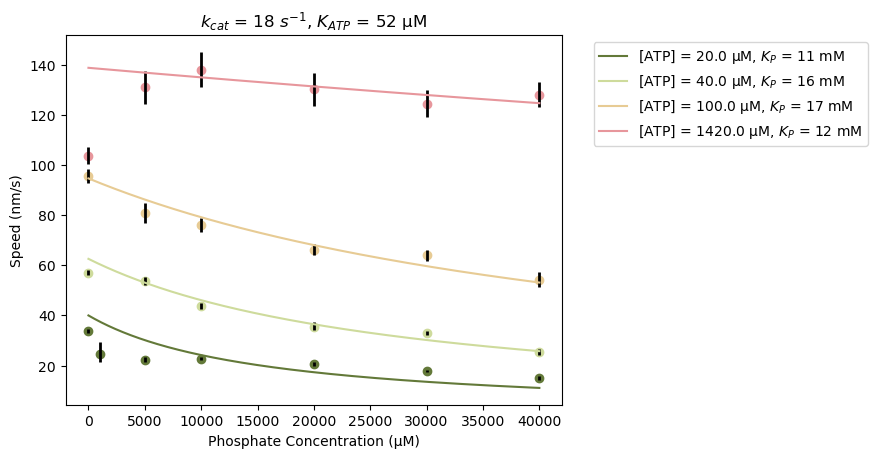

In [22]:
df_temp=df.loc[(df["ADP_Conc_uM"] == 0)]
#df_temp_mean.groupby(['ATP_Conc_uM', 'P_Conc_uM'], as_index=False).mean()

#color scheme
normalize = mcolors.Normalize(vmin=0, vmax=len(np.unique(df_temp['ATP_Conc_uM'])))
colormap = cm.tab20b
scalarmappable = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappable.set_array(np.arange(len(df_temp['ATP_Conc_uM'])))

#plot
for i, val in enumerate(np.unique(df_temp['ATP_Conc_uM'])):
    df_temptemp = df_temp.loc[(df_temp['ATP_Conc_uM']==val)]
    df_temptemp_mean = df_temptemp.groupby(['ATP_Conc_uM', 'P_Conc_uM'], as_index=False).mean()
    if len(df_temptemp_mean)>1:
        plt.scatter(df_temptemp_mean['P_Conc_uM'], 
                    df_temptemp_mean['speed (nm/s)'], 
                    color = colormap(normalize(i)))
        param, curve, xval = Kprod_curve_fit(df_temptemp_mean['P_Conc_uM'], df_temptemp_mean['speed (nm/s)'], ATPconc=val, kcat=18, Kt=52, maxconc=np.max(df_temptemp_mean['P_Conc_uM']), d=8, p0=[50])
        plt.plot(xval, curve, c=colormap(normalize(i)), label ='[ATP] = %s µM, $K_{P}$ = %s mM' %(val, round(param[0]/1000)))#+ str(val) + ' µM, $K_P$ = ' + str(round(param[0])) +' mM')

    # confidence intervals
        for i, p in enumerate(np.unique(df_temp['P_Conc_uM'])):
            temp_data = np.sort(df_temptemp.loc[(df_temp['P_Conc_uM'] == p)]['speed (nm/s)'])
            confint = conf_int(temp_data, 1000)
            erb[i] = confint
            numpt[i] = len(temp_data)
            plt.vlines(p, confint[0], confint[1], color='k', lw=2)

#plot labels
plt.xlabel('Phosphate Concentration (µM)')
plt.ylabel('Speed (nm/s)')
plt.title('$k_{cat}$ = %s $s^{-1}$, $K_{ATP}$ = %s µM' %(18, 52))
plt.legend(bbox_to_anchor=(1.05, 1.0))

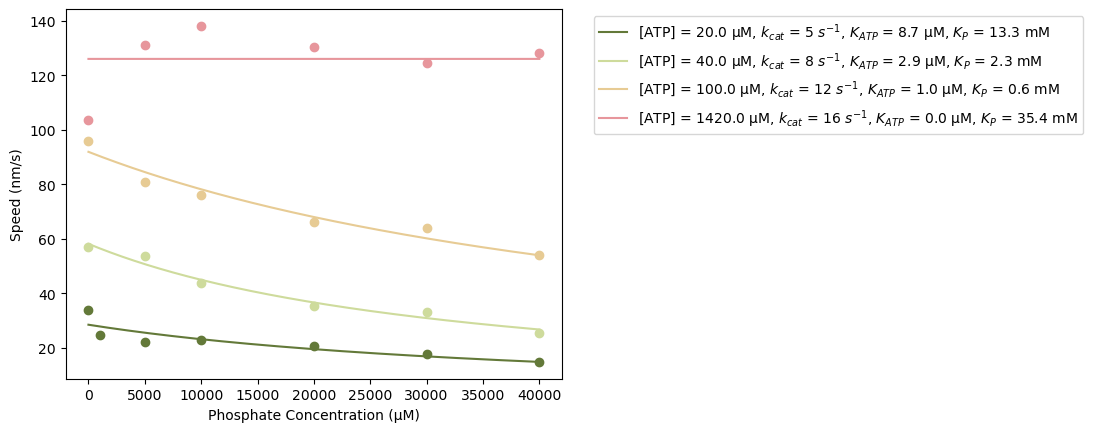

In [23]:
df_temp=df.loc[(df["ADP_Conc_uM"] == 0)].groupby(['ATP_Conc_uM', 'P_Conc_uM'], as_index=False).mean()

normalize = mcolors.Normalize(vmin=0, vmax=len(np.unique(df_temp['ATP_Conc_uM'])))
colormap = cm.tab20b
scalarmappable = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappable.set_array(np.arange(len(df_temp['ATP_Conc_uM'])))

for i, val in enumerate(np.unique(df_temp['ATP_Conc_uM'])):
    df_temptemp = df_temp.loc[(df_temp['ATP_Conc_uM']==val)]
    if len(df_temptemp)>1:
        plt.scatter(df_temptemp['P_Conc_uM'], 
                    df_temptemp['speed (nm/s)'], 
                    color = colormap(normalize(i)))
        param, curve, xval = Kprod_glob_curve_fit(df_temptemp['P_Conc_uM'], df_temptemp['speed (nm/s)'], ATPconc=val, maxconc=np.max(df_temptemp['P_Conc_uM']), d=8, p0=[20, 50, 50])
        plt.plot(xval, curve, c=colormap(normalize(i)), 
                 label ='[ATP] = %s µM, $k_{cat}$ = %s $s^{-1}$, $K_{ATP}$ = %s µM, $K_{P}$ = %s mM' %(val, round(param[0]), round(param[1],1), round(param[2]/1000, 1)))

plt.xlabel('Phosphate Concentration (µM)')
plt.ylabel('Speed (nm/s)')
plt.legend(bbox_to_anchor=(1.05, 1.0))

In [25]:
df_temp

,ATP_Conc_uM,P_Conc_uM,major_axis_length,minor_axis_length,centroid-0,centroid-1,orientation,speed (nm/s),r^2,skele r^2,...,MT_Conc_uM,ADP_Conc_uM,Flag_Conc_mg-ml,Acq_Time_s,Time_Interval_s,Cy5_exptime_ms,Cy5_gain,YFP_exptime_ms,YFP_gain,Temperature
0,2.0,0.0,18.501697,1.344079,259.539939,258.543869,-0.144917,14.018494,0.878228,0.607781,...,0.04,0.0,0.02,100.0,1.0,60.0,300.0,100.0,4.0,27.186047
1,5.0,0.0,23.224265,1.414174,257.513893,259.808904,0.072711,15.568493,0.915190,0.699841,...,0.04,0.0,0.02,100.0,1.0,60.0,300.0,100.0,4.0,27.193939
2,10.0,0.0,22.847417,1.377993,257.814760,248.660552,0.072989,14.686828,0.918590,0.705696,...,0.04,0.0,0.02,100.0,1.0,60.0,300.0,100.0,4.0,27.166923
3,20.0,0.0,29.113015,1.822138,247.211331,254.740048,-0.038670,33.773560,0.948056,0.838056,...,0.04,0.0,0.02,100.0,1.0,60.0,300.0,100.0,4.0,27.156701
4,20.0,1000.0,28.112084,1.406990,235.585661,242.711658,0.073437,24.671650,0.943877,0.785016,...,0.04,0.0,0.02,100.0,1.0,60.0,300.0,100.0,4.0,NaN
5,20.0,5000.0,23.146049,1.534217,256.232939,252.444899,0.031523,22.305476,0.938487,0.802525,...,0.04,0.0,0.02,100.0,1.0,60.0,300.0,100.0,4.0,NaN
6,20.0,10000.0,24.491928,1.534758,246.025867,240.885672,0.091931,22.792047,0.943398,0.806091,...,0.04,0.0,0.02,100.0,1.0,60.0,300.0,100.0,4.0,NaN
7,20.0,20000.0,22.804870,1.521979,267.471295,253.494038,0.111009,20.701881,0.939443,0.790884,...,0.04,0.0,0.02,100.0,1.0,60.0,300.0,100.0,4.0,NaN
8,20.0,30000.0,22.026644,1.445460,258.736999,256.052716,0.082412,17.771454,0.932983,0.768665,...,0.04,0.0,0.02,100.0,1.0,60.0,300.0,100.0,4.0,NaN
9,20.0,40000.0,22.711751,1.500876,259.246403,246.448642,0.133989,14.901229,0.917018,0.702012,...,0.04,0.0,0.02,100.0,1.0,60.0,300.0,100.0,4.0,NaN


np.unique(df_temp['ATP_Conc_uM'])

(-10.0, 400.0)

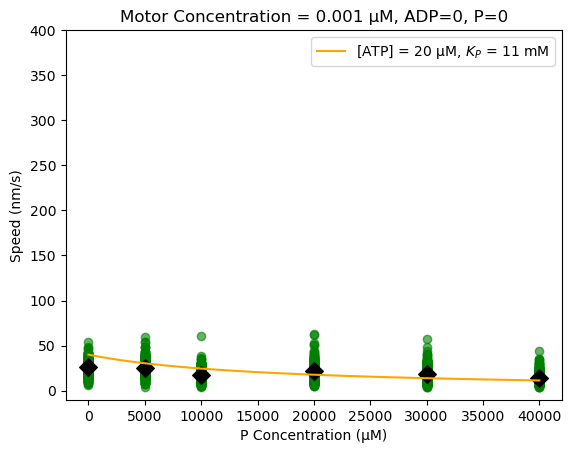

In [26]:
df_temp=df.loc[(df["date"] == '2023-10-31')].loc[(df["Motor_Conc_uM"] == 0.001)].loc[(df["ATP_Conc_uM"]==20)].loc[(df["ADP_Conc_uM"] == 0)]
plt.scatter(df_temp['P_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.6, c='g')

P_mean = df_temp.groupby('P_Conc_uM', as_index=False).mean()['P_Conc_uM']
P_mean_speed = df_temp.groupby('P_Conc_uM', as_index=False).mean()['speed (nm/s)']
plt.scatter( df_temp.groupby('P_Conc_uM').mean().reset_index()['P_Conc_uM'], df_temp.groupby('P_Conc_uM').mean().reset_index()['speed (nm/s)'], c='k', s=80, marker='D') 

param, curve, xval = Kprod_curve_fit(P_mean, P_mean_speed, ATPconc=20, kcat=18, Kt=52, maxconc=np.max(P_mean), d=8, p0=[50])
plt.plot(xval, curve, c='orange', label ='[ATP] = 20 µM, $K_P$ = ' + str(round(param[0]/1000)) +' mM')

plt.legend()
# plt.xscale('symlog')
plt.xlabel('P Concentration (µM)')
plt.ylabel('Speed (nm/s)')
plt.title('Motor Concentration = 0.001 µM, ADP=0, P=0')
plt.ylim(-10,400)

/Users/anaduarte/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/anaduarte/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/anaduarte/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/anaduarte/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/anaduarte/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/anaduarte/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/anaduarte/opt/a

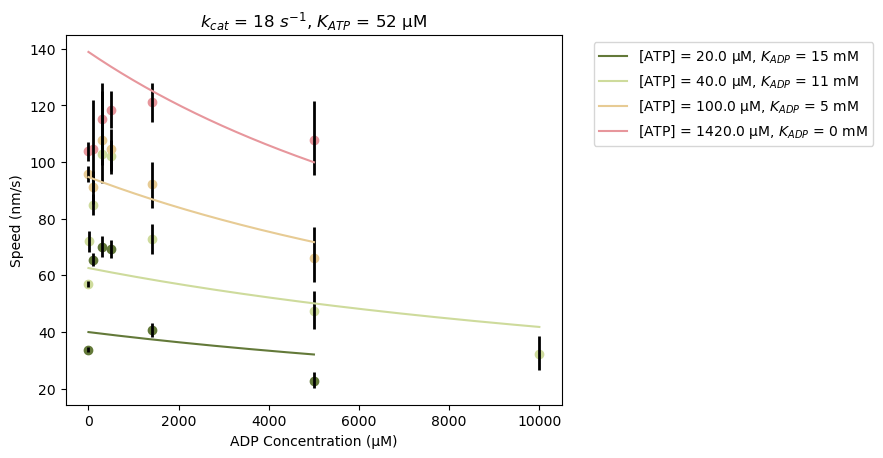

In [27]:
df_temp=df.loc[(df["P_Conc_uM"] == 0)]
#df_temp_mean.groupby(['ATP_Conc_uM', 'P_Conc_uM'], as_index=False).mean()

#color scheme
normalize = mcolors.Normalize(vmin=0, vmax=len(np.unique(df_temp['ATP_Conc_uM'])))
colormap = cm.tab20b
scalarmappable = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappable.set_array(np.arange(len(df_temp['ATP_Conc_uM'])))

#plot
for i, val in enumerate(np.unique(df_temp['ATP_Conc_uM'])):
    df_temptemp = df_temp.loc[(df_temp['ATP_Conc_uM']==val)]
    df_temptemp_mean = df_temptemp.groupby(['ATP_Conc_uM', 'ADP_Conc_uM'], as_index=False).mean()
    if len(df_temptemp_mean)>1:
        plt.scatter(df_temptemp_mean['ADP_Conc_uM'], 
                    df_temptemp_mean['speed (nm/s)'], 
                    color = colormap(normalize(i)))
        param, curve, xval = Kprod_curve_fit(df_temptemp_mean['ADP_Conc_uM'], df_temptemp_mean['speed (nm/s)'], ATPconc=val, kcat=18, Kt=52, maxconc=np.max(df_temptemp_mean['ADP_Conc_uM']), d=8, p0=[50])
        plt.plot(xval, curve, c=colormap(normalize(i)), label ='[ATP] = %s µM, $K_{ADP}$ = %s mM' %(val, round(param[0]/1000)))#+ str(val) + ' µM, $K_P$ = ' + str(round(param[0])) +' mM')

    # confidence intervals
        for i, adp in enumerate(np.unique(df_temp['ADP_Conc_uM'])):
            temp_data = np.sort(df_temptemp.loc[(df_temp['ADP_Conc_uM'] == adp)]['speed (nm/s)'])
            confint = conf_int(temp_data, 1000)
            erb[i] = confint
            numpt[i] = len(temp_data)
            plt.vlines(adp, confint[0], confint[1], color='k', lw=2)

#plot labels
plt.xlabel('ADP Concentration (µM)')
plt.ylabel('Speed (nm/s)')
plt.title('$k_{cat}$ = %s $s^{-1}$, $K_{ATP}$ = %s µM' %(18, 52))
plt.legend(bbox_to_anchor=(1.05, 1.0))

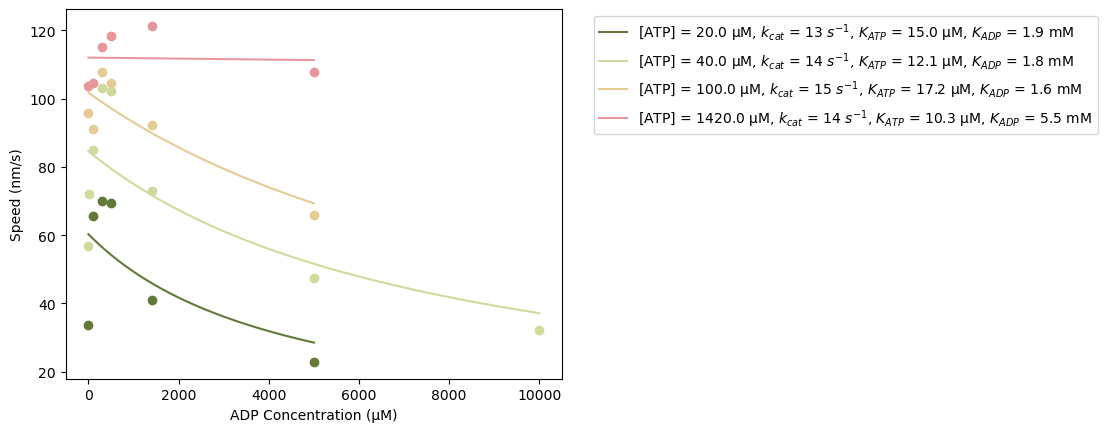

In [29]:
df_temp=df.loc[(df["P_Conc_uM"] == 0)].groupby(['ATP_Conc_uM', 'ADP_Conc_uM'], as_index=False).mean()

normalize = mcolors.Normalize(vmin=0, vmax=len(np.unique(df_temp['ATP_Conc_uM'])))
colormap = cm.tab20b
scalarmappable = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappable.set_array(np.arange(len(df_temp['ATP_Conc_uM'])))

for i, val in enumerate(np.unique(df_temp['ATP_Conc_uM'])):
    df_temptemp = df_temp.loc[(df_temp['ATP_Conc_uM']==val)]
    if len(df_temptemp)>1:
        plt.scatter(df_temptemp['ADP_Conc_uM'], 
                    df_temptemp['speed (nm/s)'], 
                    color = colormap(normalize(i)))
        param, curve, xval = Kprod_glob_curve_fit(df_temptemp['ADP_Conc_uM'], df_temptemp['speed (nm/s)'], ATPconc=val, maxconc=np.max(df_temptemp['ADP_Conc_uM']), d=8, p0=[20, 50, 50])
        plt.plot(xval, curve, c=colormap(normalize(i)), 
                 label ='[ATP] = %s µM, $k_{cat}$ = %s $s^{-1}$, $K_{ATP}$ = %s µM, $K_{ADP}$ = %s mM' %(val, round(param[0]), round(param[1],1), round(param[2]/1000, 1)))

plt.xlabel('ADP Concentration (µM)')
plt.ylabel('Speed (nm/s)')
plt.legend(bbox_to_anchor=(1.05, 1.0))